# Results and visualization

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import numpy as np
from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.cluster import MiniBatchKMeans, KMeans, SpectralClustering
from pprint import pprint

from src.load_and_save import load_list

### Load node features, and CELF and PageRank top nodes

In [2]:
feature_extraction_path = "data/feature_extractions.csv"
celf_path = "data/100_spreaders_celf.txt"
pagerank_path = "data/100_spreaders_pagerank.txt"
generators_path = f"data/100_generators.txt"

In [3]:
# Load cluster nodes
cluster_df = pd.read_csv(feature_extraction_path)
#cluster_df = cluster_df.copy()[['cluster', 'node']]

In [4]:
# Generated from 02_influential_users: k = 100
# CELF_top_k_nodes = [26, 4, 10179, 134, 718, 15439, 27, 8312, 16514, 7020, 407, 4509, 1, 16970, 2760, 6940, 492, 13912, 20718, 16304, 4218, 370, 12899, 7111, 3106, 14565, 4564, 18506, 15436, 5851, 7801, 13139, 5799, 14957, 8591, 64853, 20972, 14803, 11521, 994, 32, 21929, 6982, 17332, 9036, 4514, 9941, 11170, 16131, 6992, 128, 11118, 9903, 17527, 9231, 12159, 14540, 11256, 1597, 30, 9384, 13074, 5669, 15794, 16990, 5064, 14945, 21704, 13820, 18086, 13881, 19837, 13239, 10, 19035, 10390, 9254, 621, 8742, 14131, 15741, 18094, 10340, 18775, 10339, 10276, 10814, 10789, 13511, 15857, 9863, 22382, 6708, 10194, 7234, 6136, 9352, 4344, 9155, 3820]
CELF_top_k_nodes = load_list(celf_path)

In [5]:
# Generated from 02_influential_users: k = 100
# PageRank_top_k_nodes = [88, 26, 1988, 77, 4, 677, 14454, 640, 2342, 8016, 2567, 349, 3571, 8135, 13808, 134, 5226, 27, 3335, 3998, 1343, 11714, 47794, 2320, 1390, 73, 132690, 50901, 4380, 13416, 9964, 12751, 519, 76, 408, 291, 40, 89784, 129960, 39889, 16708, 389, 511, 14440, 19706, 1270, 9914, 718, 26398, 625, 139269, 6241, 46117, 39420, 64911, 13813, 5907, 18938, 244854, 220, 14907, 52497, 1521, 14915, 11355, 15821, 3808, 228, 383, 8, 135913, 7274, 301, 31650, 288958, 126242, 8126, 11539, 99369, 15207, 456, 117680, 510, 185777, 996, 752, 198042, 9762, 48581, 64328, 83432, 69585, 25891, 80, 36795, 10159, 47010, 765, 369, 20461]
PageRank_top_k_nodes = load_list(pagerank_path)

In [6]:
generator_nodes = load_list(generators_path)

In [7]:
cluster_df.columns

Index(['Unnamed: 0', 'id', 'in_degree(mean)(mean)(mean)(mean)(mean)(mean)',
       'in_degree(mean)(mean)(mean)(mean)(mean)',
       'external_edges(mean)(mean)(mean)(mean)',
       'in_degree(mean)(mean)(mean)(mean)', 'in_degree(sum)(mean)(mean)(mean)',
       'external_edges(mean)(mean)(mean)', 'external_edges(sum)(mean)(mean)',
       'in_degree(mean)(mean)(mean)', 'in_degree(sum)(mean)(mean)',
       'total_degree(sum)(mean)(mean)', 'external_edges(mean)(mean)',
       'external_edges(sum)(mean)', 'in_degree(mean)(mean)',
       'in_degree(sum)(mean)', 'internal_edges(mean)(mean)',
       'internal_edges(sum)(mean)', 'out_degree(mean)(mean)',
       'total_degree(sum)(mean)', 'external_edges(mean)',
       'external_edges(sum)', 'in_degree(mean)', 'in_degree(sum)',
       'internal_edges(mean)', 'internal_edges(sum)', 'out_degree(mean)',
       'total_degree(mean)', 'total_degree(sum)', 'external_edges',
       'in_degree', 'internal_edges', 'out_degree', 'total_degree',
       'Be

# Dimensionality reduction

In [7]:
cluster_df = cluster_df.drop(columns=['Unnamed: 0', 'cluster', 'Betweeness Centrality'])

In [27]:
cluster_df

,id,in_degree(mean)(mean)(mean)(mean)(mean)(mean),in_degree(mean)(mean)(mean)(mean)(mean),external_edges(mean)(mean)(mean)(mean),in_degree(mean)(mean)(mean)(mean),in_degree(sum)(mean)(mean)(mean),external_edges(mean)(mean)(mean),external_edges(sum)(mean)(mean),in_degree(mean)(mean)(mean),in_degree(sum)(mean)(mean),...,internal_edges(mean),internal_edges(sum),out_degree(mean),total_degree(mean),total_degree(sum),external_edges,in_degree,internal_edges,out_degree,total_degree
0,2,378.806888,386.939511,3946.214369,398.161717,24233.771668,3841.426413,297102.043671,421.710482,25385.205366,...,1026.105263,58488.0,66.350877,660.877193,37670.0,3149,654,690,57,711
1,3,379.050907,383.313239,3984.477170,391.563404,23576.126641,3869.961766,262825.819781,392.751203,21392.758349,...,692.833333,12471.0,56.000000,488.388889,8791.0,902,41,124,18,59
2,4,377.329381,379.375909,4233.439899,381.143598,24401.884456,4252.216193,344096.564927,382.548051,24458.767015,...,862.250980,219874.0,65.603922,373.635294,95277.0,11852,1494,5132,255,1749
3,5,384.391760,389.687407,4439.565723,396.509063,26853.931382,4557.419059,421048.376910,407.883068,29373.616713,...,1311.666667,55090.0,80.047619,653.285714,27438.0,2914,445,490,42,487
4,6,384.197811,386.219248,4319.218987,386.600495,25061.801511,4374.431622,362984.602354,391.524500,25824.583046,...,1345.264151,71299.0,90.132075,524.622642,27805.0,4298,2256,532,53,2309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16494,444546,222.692949,196.722668,1957.281913,165.964317,8506.772603,1761.431556,100632.312500,120.911233,7017.925000,...,1957.000000,1957.0,80.000000,305.000000,305.0,80,0,1,1,1
16495,446560,436.585144,458.978599,4930.984043,497.973987,30389.125819,4765.589368,334776.867479,559.365943,29412.638908,...,370.833333,2225.0,29.000000,1108.500000,6651.0,167,0,13,6,6
16496,449779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,5.000000,5.0,0,0,1,1,1
16497,456041,379.617720,399.456244,5694.731442,434.618310,27990.319065,5555.092541,450854.313589,533.870885,24679.291812,...,851.000000,1702.0,48.000000,1466.500000,2933.0,94,0,4,2,2


### t-SNE

In [76]:
a = TSNE(n_components=2).fit_transform(cluster_df)

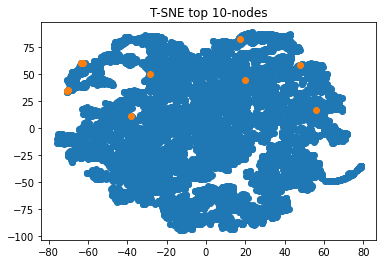

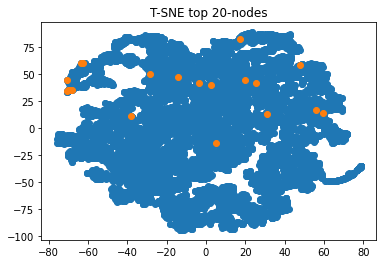

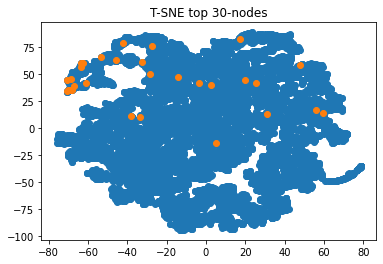

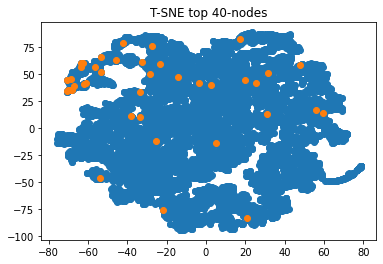

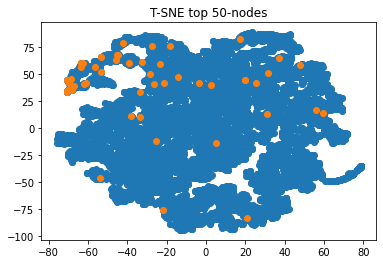

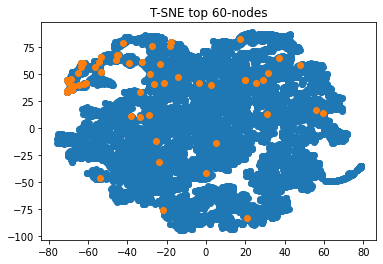

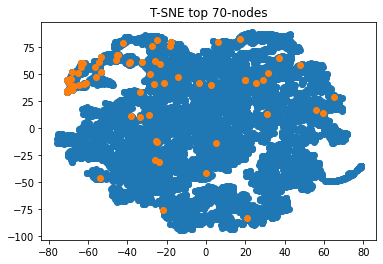

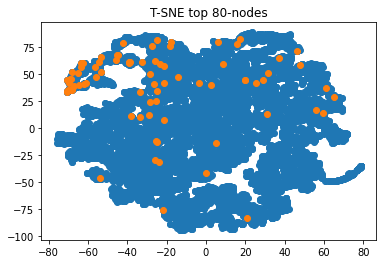

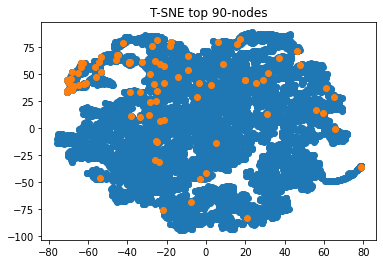

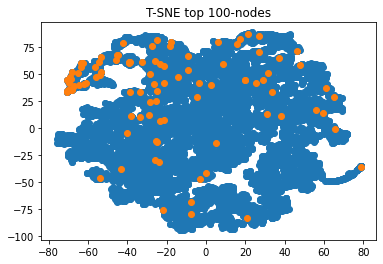

In [77]:
batch_size = [i*10 for i in range(1,11)] 

for batch in batch_size: 
    indices = []
    for node in PageRank_top_k_nodes[:batch]:
        indices.append(cluster_df[cluster_df.id == node ].index[0])
    plt.scatter(a[:,0], a[:,1])
    plt.scatter(a[indices][:,0], a[indices][:,1], )
    plt.title(f"T-SNE top {batch}-nodes")
    plt.show()

### PCA and loading plot
Does not work -- let's try 3d

In [19]:
pca = PCA(n_components=2, svd_solver='auto')
a = pca.fit_transform(cluster_df)
pca.explained_variance_ratio_

array([0.78346149, 0.1789805 ])

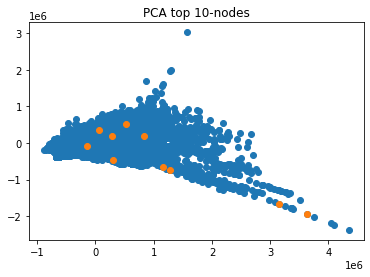

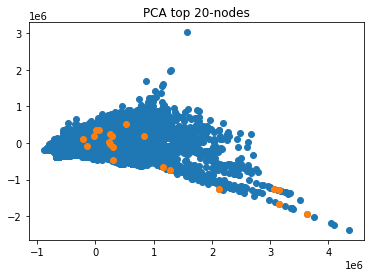

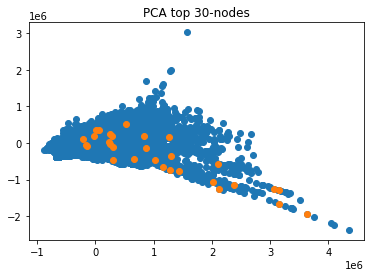

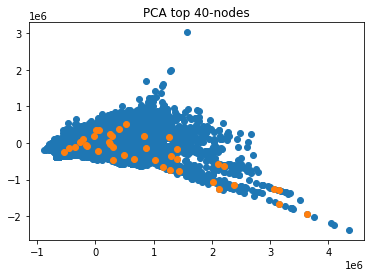

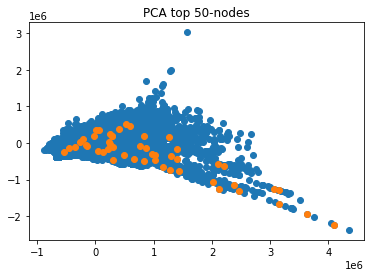

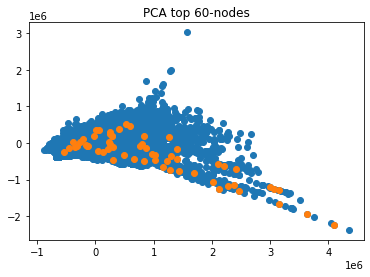

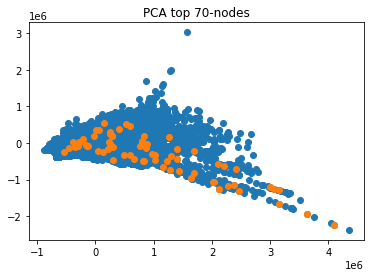

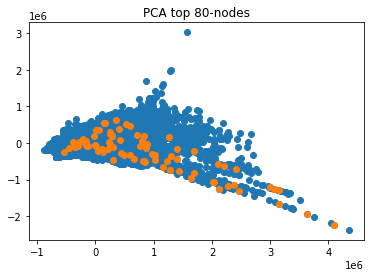

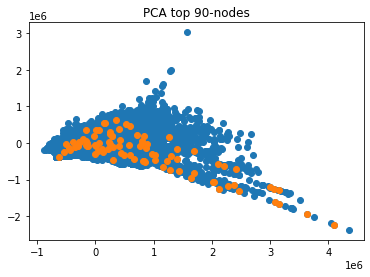

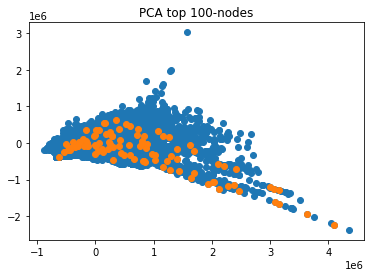

In [38]:
batch_size = [i * 10 for i in range(1, 11)] 

for batch in batch_size:
    indices = []
    for node in PageRank_top_k_nodes[:batch]:
        indices.append(cluster_df[cluster_df.id == node ].index[0])
    plt.scatter(a[:,0], a[:,1])
    plt.scatter(a[indices][:,0], a[indices][:,1], )
    plt.title(f"PCA top {batch}-nodes")
    plt.show()

### Isomap

In [8]:
embedding = Isomap(n_components=2, n_neighbors=10)
X_transformed = embedding.fit_transform(cluster_df)
X_transformed.shape

(16499, 2)

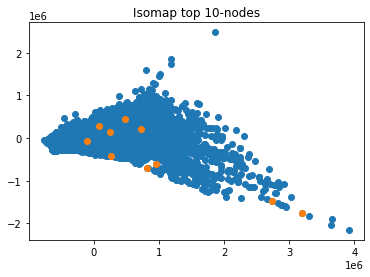

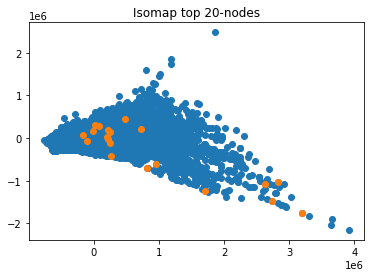

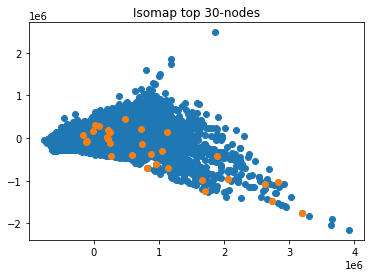

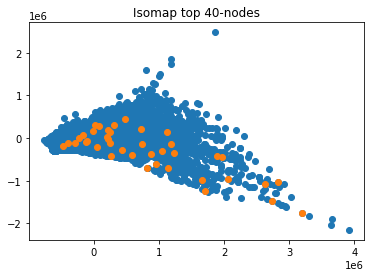

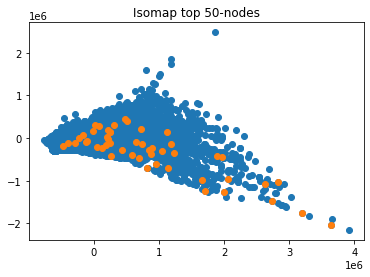

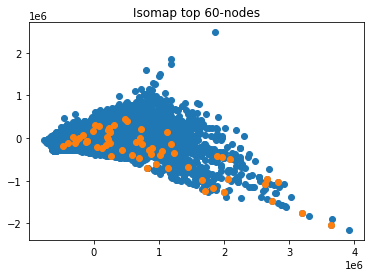

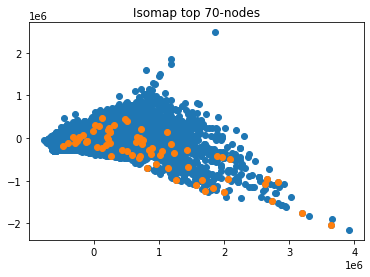

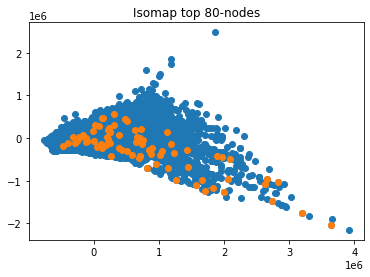

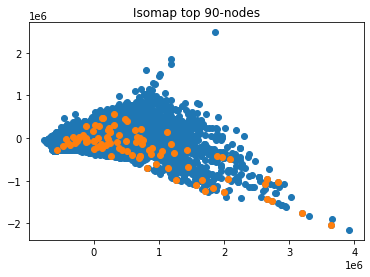

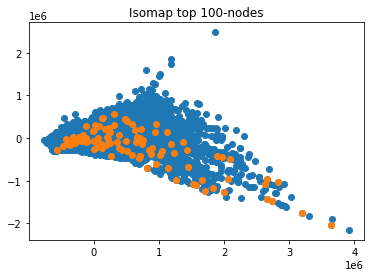

In [9]:
a = X_transformed
batch_size = [i * 10 for i in range(1, 11)] 

for batch in batch_size:
    indices = []
    for node in PageRank_top_k_nodes[:batch]:
        indices.append(cluster_df[cluster_df.id == node ].index[0])
    plt.scatter(a[:,0], a[:,1])
    plt.scatter(a[indices][:,0], a[indices][:,1], )
    plt.title(f"Isomap top {batch}-nodes")
    plt.show()


----

# Clustering

### MeanShift

In [15]:
clustering = MeanShift()
all_clusters = clustering.fit_predict(cluster_df)

In [22]:
max(all_clusters)

13

In [30]:
indices = []
for node in PageRank_top_k_nodes[:batch]:
    indices.append(cluster_df[cluster_df.id == node ].index[0])

In [33]:
top_clusters = all_clusters[indices]

In [36]:
cluster_count = {}
for item in all_clusters:
    cluster_count[item] = cluster_count[item] + 1 if item in cluster_count else 1
pprint(cluster_count)

{0: 15022,
 1: 852,
 8: 489,
 2: 65,
 3: 13,
 4: 49,
 13: 1,
 12: 1,
 5: 2,
 11: 1,
 10: 1,
 9: 1,
 7: 1,
 6: 1}

In [37]:
top_count = {}
for item in top_clusters:
    top_count[item] = top_count[item] + 1 if item in top_count else 1
pprint(top_count)

{8: 5, 3: 2, 1: 22, 0: 62, 5: 1, 2: 7, 13: 1}

### MiniBatch KMeans

In [62]:
kmeans = KMeans(n_clusters=3, random_state=42).fit_predict(cluster_df)

In [63]:
max(kmeans)

2

In [64]:
cluster_count = {}
for item in kmeans:
    cluster_count[item] = cluster_count[item] + 1 if item in cluster_count else 1
    
pprint(cluster_count)

{0: 5203, 1: 10373, 2: 923}


In [65]:
top_clusters = kmeans[indices]

top_count = {}

for item in top_clusters:
    top_count[item] = top_count[item] + 1 if item in top_count else 1
pprint(top_count)

{0: 38, 1: 26, 2: 36}


### Spectral Clustering GMM

In [66]:
clustering = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=42).fit_predict(cluster_df)

/Users/alexcosta/Documents/GitHub/twitter-superspreaders/venv/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [67]:
cluster_count = {}
for item in clustering:
    cluster_count[item] = cluster_count[item] + 1 if item in cluster_count else 1
    
pprint(cluster_count)

{0: 7327, 1: 2416, 2: 6756}


In [68]:
top_clusters = clustering[indices]

top_count = {}

for item in top_clusters:
    top_count[item] = top_count[item] + 1 if item in top_count else 1
pprint(top_count)

{0: 44, 1: 11, 2: 45}


---

## Cluster sizes

In [ ]:
ax = sns.countplot(x="cluster",data=cluster_df, order=[f"role_{i}" for i in range(8)], color='deepskyblue')

In [ ]:
role_count = cluster_df.groupby(['cluster']).count()['id'].to_dict()

--------------

---

## Filtered DF for CELF and PageRank

In [ ]:
Celf_nodes = CELF_top_k_nodes.copy()
PageRank_nodes = PageRank_top_k_nodes.copy()

In [ ]:
CELF_features = spreading_features[spreading_features.node.isin(Celf_nodes)]

In [ ]:
PageRank_features = spreading_features[spreading_features.node.isin(PageRank_nodes)]